## Kaggle score: 
- v1: alpha:0.4 = 91591
- v1: alpha:1 = 21748
- v2: alpha:0.1 = 14805
- v2: alpha:0.05 = 14496
- v2: alpha:2 = 14440
- v3: alpha:1 = 14865


# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,auc,roc_curve,confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
train = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/train_fe_v3.csv')
test = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/test_fe_v3.csv')

# Fit model

# Define predictors and target

In [3]:
# Converto to numpy
x_columns = train.columns.drop(['SalePrice','Unnamed: 0' ])
x = train[x_columns].values
y = train['SalePrice'].values
x_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'YearBuilt_0.5', 'YearBuilt_2', 'YearBuilt_3', 'YearBuilt_4',
       'YearBuilt_5', 'FireplaceQu_0.5', 'FireplaceQu_2', 'FireplaceQu_3',
       'FireplaceQu_4', 'FireplaceQu_5'],
      dtype='object', length=144)

## Split data

In [4]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

# Model

In [23]:
# The analysis at the bottom show that the best regularization parameter is alpha = 0.04 for R2
# For KAggle, different values like alpha = 2 gave better results


model = Ridge(alpha=2)

model.fit(x_train,y_train)

Ridge(alpha=2)

In [24]:
y_pred = model.predict(x_test)
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [25]:
print(f'R2 = {round(R2,3)} and MAE = {round(MAE,3)}')

R2 = 0.921 and MAE = 15167.257


In [26]:
np.mean(model.coef_**2)/1000000000

0.1495232568955172

# Making predictions

In [27]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,YearBuilt_0.5,YearBuilt_2,YearBuilt_3,YearBuilt_4,YearBuilt_5,FireplaceQu_0.5,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5
0,0,1461,0.785714,0.50,0.439560,0.167317,1.0,1.0,0.000000,0.333333,...,0.770846,0.353077,0.209799,0.124663,0.074075,0.447214,0.04,0.008,0.0016,0.00032
1,1,1462,0.785714,0.75,0.445055,0.205396,1.0,1.0,0.333333,0.333333,...,0.756613,0.327715,0.187605,0.107397,0.061481,0.447214,0.04,0.008,0.0016,0.00032
2,2,1463,1.000000,0.75,0.406593,0.199105,1.0,1.0,0.333333,0.333333,...,0.924701,0.731149,0.625185,0.534579,0.457104,0.774597,0.36,0.216,0.1296,0.07776
3,3,1464,1.000000,0.75,0.428571,0.143649,1.0,1.0,0.333333,0.333333,...,0.928611,0.743594,0.641215,0.552932,0.476803,0.894427,0.64,0.512,0.4096,0.32768
4,4,1465,0.928571,0.75,0.236264,0.072055,1.0,1.0,0.333333,1.000000,...,0.904898,0.670500,0.549033,0.449570,0.368126,0.447214,0.04,0.008,0.0016,0.00032


In [28]:
x_ids = test['Id']
test_columns = test.columns.drop(['Unnamed: 0','Id'])
x_test_2 = test[test_columns].values

x_ids


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [29]:
y_pred_2 = model.predict(x_test_2)

final=pd.DataFrame(data={'Id':x_ids,'SalePrice':y_pred_2})
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [30]:
# Run the code to save predictions in the format used for competition scoring

final.to_csv('../submissions/submission_regression_v1_3.csv',index=False)

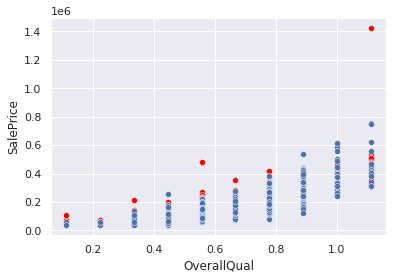

In [31]:
sns.scatterplot(x=test['OverallQual'],y=final['SalePrice'],color="red");
sns.scatterplot(x=train['OverallQual'],y=train['SalePrice']);
plt.savefig('bad_results.png')

## mean R2

0.9195138273157827


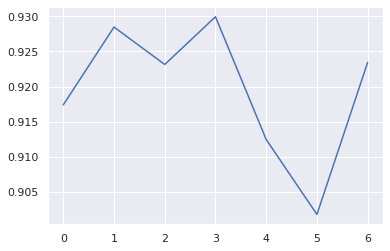

In [14]:
R2s = list()
MAEs = list()
for i in range(3,10):
    # Create train/test
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=i)
    # start model 
    model = Ridge(alpha=0.4)
    # fit model
    model.fit(x_train,y_train)
    # predictions
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)
plt.plot(R2s)
print(np.mean(R2s))

# Looking for the best regularization parameter

0.01: 0.9229382314602238
0.03: 0.9234048324244303
0.1: 0.9237815977072694
0.3: 0.9233568827649841
1: 0.9221054906814214
3: 0.9192511007759282
10: 0.9104343154671763
30: 0.8930389823060905


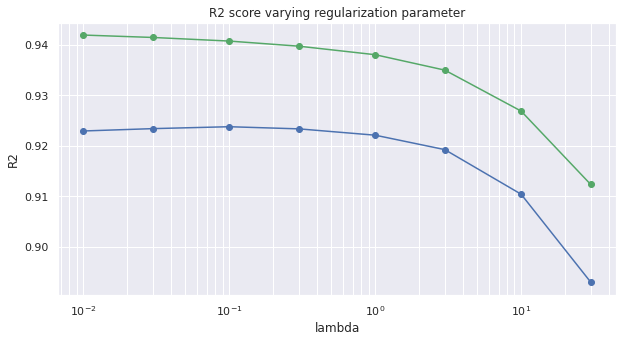

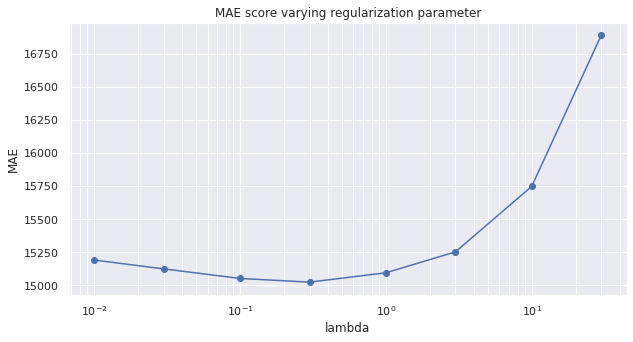

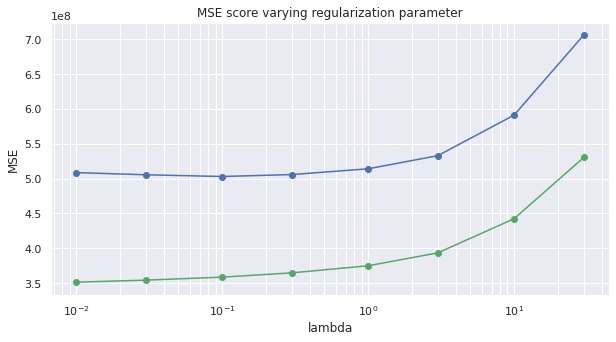

In [15]:
# spliting data
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

lambdas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] 

R2s = list()
R2s_train = list()
MAEs = list()
MSEs = list()
MSEs_train = list()

for i in lambdas:
    #model
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    #metrics
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    R2_train = r2_score(y_train, y_pred_train)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    R2s.append(R2)
    R2s_train.append(R2_train)
    MAEs.append(MAE)
    MSEs.append(MSE)
    MSEs_train.append(MSE_train)
    print(f'{i}: {R2}')
    
# Plot R2
plt.figure(figsize=(10,5));    
plt.plot(lambdas,R2s,'-bo',
         lambdas,R2s_train,'-go');
plt.xlabel("lambda");
plt.ylabel("R2");
plt.title("R2 score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MAEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MAEs,'-o');
plt.xlabel("lambda");
plt.ylabel("MAE");
plt.title("MAE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MSEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MSEs,'-bo',
        lambdas,MSEs_train,'-go');
plt.xlabel("lambda");
plt.ylabel("MSE");
plt.title("MSE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

0.923133381929255


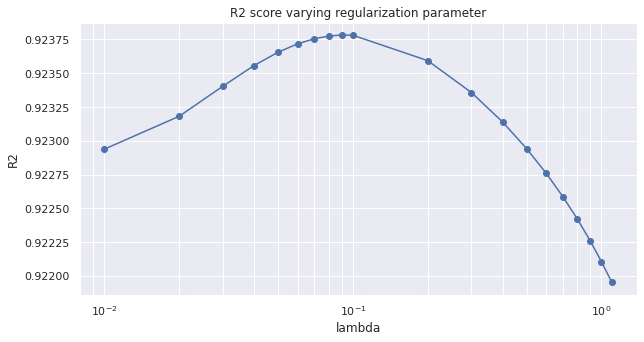

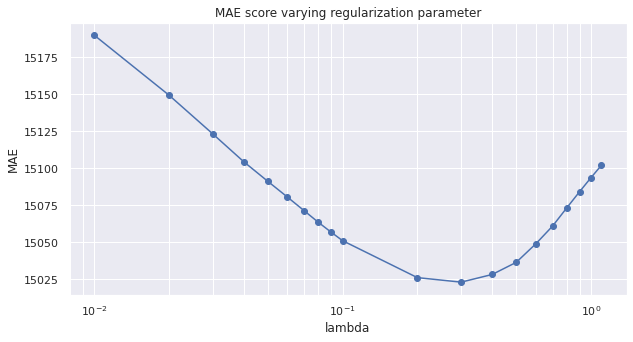

In [16]:
# spliting data
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

lambdas = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1] 

R2s = list()
MAEs = list()
MSEs = list()

for i in lambdas:
    #model
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    #metrics
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

print(np.mean(R2s))
    
# Plot R2
plt.figure(figsize=(10,5));    
plt.plot(lambdas,R2s,'-o');
plt.xlabel("lambda");
plt.ylabel("R2");
plt.title("R2 score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MAEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MAEs,'-o');
plt.xlabel("lambda");
plt.ylabel("MAE");
plt.title("MAE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Learn curves

## alpha = 2

In [17]:
J_trains = list()
J_tests = list()
x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=5)
for i in range(100,1410,10):
    # start model 
    model = Ridge(alpha=0.07)
    # fit model
    model.fit(x_train[0:i,:],y_train[0:i])
    # predictions
    y_pred_train = model.predict(x_train[0:i,:])
    y_pred_test = model.predict(x_test[0:i,:])
    J_train = mean_squared_error(y_train[0:i],y_pred_train[0:i])
    J_test = mean_squared_error(y_test[0:i],y_pred_test[0:i])
    J_trains.append(J_train)
    J_tests.append(J_test)


In [18]:
(J_tests[-1]-J_trains[-1])/10000000

14.600248239569462

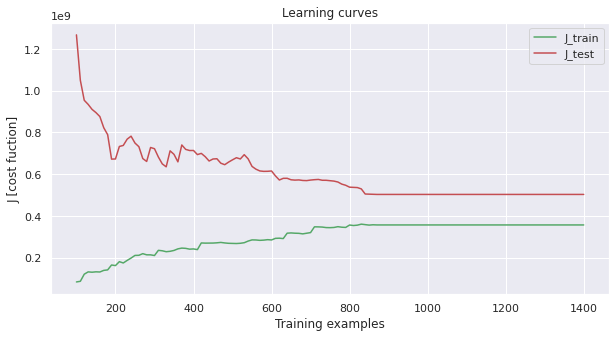

In [19]:
x1 = np.array(range(100,1410,10))

plt.figure(figsize=(10,5));

plt.plot(x1,J_trains,'g',
        x1,J_tests,'r');

plt.xlabel("Training examples");
plt.ylabel("J [cost fuction]");
plt.legend(['J_train','J_test']);
plt.title("Learning curves");

## alpha=5

In [20]:
J_trains = list()
J_tests = list()
x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=5)
for i in range(100,1410,10):
    # start model 
    model = Ridge(alpha=5)
    # fit model
    model.fit(x_train[0:i,:],y_train[0:i])
    # predictions
    y_pred_train = model.predict(x_train[0:i,:])
    y_pred_test = model.predict(x_test[0:i,:])
    J_train = mean_squared_error(y_train[0:i],y_pred_train[0:i])
    J_test = mean_squared_error(y_test[0:i],y_pred_test[0:i])
    J_trains.append(J_train)
    J_tests.append(J_test)


In [21]:
(J_tests[-1]-J_trains[-1])/10000000

14.15617021593256

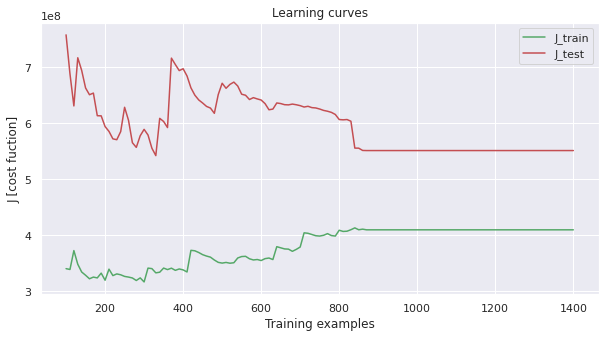

In [22]:
x1 = np.array(range(100,1410,10))

plt.figure(figsize=(10,5));

plt.plot(x1,J_trains,'g',
        x1,J_tests,'r');

plt.xlabel("Training examples");
plt.ylabel("J [cost fuction]");
plt.legend(['J_train','J_test']);
plt.title("Learning curves");

## lower regularization parameter gives higher variance, ence more error in Kaggle